# *GTDA*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import CubicalPersistence

with np.load("../Dataset/mnist.npz") as data:
    x_train, y_train = data['x_train'], data['y_train']

x_train = x_train.reshape(-1, 28, 28) / 255.0

cp = CubicalPersistence(homology_dimensions=[0, 1], n_jobs=-1)

batch_size = 1000
num_batches = int(np.ceil(len(x_train) / batch_size))

all_diagrams = []

for i in range(num_batches):
    print(f"Processing batch {i+1}/{num_batches}")
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(x_train))
    batch_images = x_train[start_idx:end_idx]

    diagrams = cp.fit_transform(batch_images)
    all_diagrams.extend(diagrams)

H0_all = []
H1_all = []

for diag in all_diagrams:
    H0_all.append(diag[diag[:, 2] == 0][:, :2])  # H0 features
    H1_all.append(diag[diag[:, 2] == 1][:, :2])  # H1 features

# Concatenate all H0 and H1 features into single arrays
H0_all = np.concatenate(H0_all)
H1_all = np.concatenate(H1_all)

# Plot settings
plt.figure(figsize=(10, 5))

# H0 Diagram
plt.subplot(1, 2, 1)
plt.scatter(H0_all[:, 0], H0_all[:, 1], label='H0', color='blue', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)  # Diagonal
plt.title('Aggregated H0 Persistence Diagram')
plt.xlabel('Birth')
plt.ylabel('Death')
plt.grid(True)

# H1 Diagram
plt.subplot(1, 2, 2)
plt.scatter(H1_all[:, 0], H1_all[:, 1], label='H1', color='orange', alpha=0.5)
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)
plt.title('Aggregated H1 Persistence Diagram')
plt.xlabel('Birth')
plt.ylabel('Death')
plt.grid(True)

plt.tight_layout()
plt.show()


KeyboardInterrupt



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from gtda.homology import CubicalPersistence

data = np.load('../Dataset/mnist.npz')
x_train = data['x_train']
y_train = data['y_train']

x_train = x_train.reshape(-1, 28, 28) / 255.0

digits = [0, 1, 2]
mask = np.isin(y_train, digits)
x_filtered = x_train[mask]
y_filtered = y_train[mask]

cp = CubicalPersistence(homology_dimensions=[1], n_jobs=-1)

batch_size = 1000
num_batches = int(np.ceil(len(x_filtered) / batch_size))

H1_all = []

for i in range(num_batches):
    print(f"Processing batch {i+1}/{num_batches}")
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(x_filtered))
    batch_images = x_filtered[start_idx:end_idx]

    diagrams = cp.fit_transform(batch_images)
    H1_all.extend(diagrams)

H1_all = [diag[diag[:, 2] == 1][:, :2] for diag in H1_all]

H1_by_digit = {digit: [] for digit in digits}
for i, diag in enumerate(H1_all):
    digit = y_filtered[i]
    H1_by_digit[digit].append(diag)

H1_by_digit = {digit: np.concatenate(diags) for digit, diags in H1_by_digit.items()}

plt.figure(figsize=(15, 5))

for i, digit in enumerate(digits):
    plt.subplot(1, 3, i + 1)
    plt.scatter(H1_by_digit[digit][:, 0], H1_by_digit[digit][:, 1], label=f'Digit {digit}', alpha=0.5)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=0.5)  # Diagonal
    plt.title(f'H1 Persistence Diagram (Digit {digit})')
    plt.xlabel('Birth')
    plt.ylabel('Death')
    plt.grid(True)

plt.tight_layout()
plt.show()

# *Ripser*

In [ ]:
import random
import numpy as np
from ripser import ripser
from persim import plot_diagrams
import tensorflow as tf

default_plot = True

data = np.load("../Dataset/mnist.npz")
X_train = data["x_train"]
y_train = data["y_train"]

X_train = X_train.reshape(X_train.shape[0], -1)

def compute_persistence_for_digit(digit, num_samples=300):
    indices = np.where(y_train == digit)[0]
    selected_indices = random.sample(list(indices), num_samples)
    subset = X_train[selected_indices]  # No PCA, full 784D
    tf_tensor = tf.convert_to_tensor(subset)
    return ripser(tf_tensor, maxdim=2)['dgms']

digits_to_compare = [0, 1, 2]

if default_plot:
    for i, digit in enumerate(digits_to_compare):
        dgms1 = compute_persistence_for_digit(digit)
        plot_diagrams(dgms1, show=True)
else:
    plt.figure(figsize=(12, 4))
    
    for i, digit in enumerate(digits_to_compare):
        dgms = compute_persistence_for_digit(digit)
        plt.subplot(1, len(digits_to_compare), i + 1)
        for j, dgm in enumerate(dgms):
            plt.scatter(dgm[:, 0], dgm[:, 1])
            plt.plot([0, np.max(dgm)], [0, np.max(dgm)], 'k--')
            plt.xlabel("Birth")
            plt.ylabel("Death")
            plt.title(f"Digit {digit}, $H_{j}$")
    
    plt.show()

In [ ]:
default_plot = True

data = np.load("../Dataset/NoReg_Extra_6.npz")
X_train = data["images"]
y_train = data["labels"]

X_train = X_train.reshape(X_train.shape[0], -1)
y_train = np.argmax(y_train, axis=1)

def compute_persistence_for_digit(digit, num_samples=300):
    indices = np.where(y_train == digit)[0]
    selected_indices = random.sample(list(indices), num_samples)
    subset = X_train[selected_indices]
    return ripser(subset, maxdim=2)['dgms']

digits_to_compare = [0, 1, 2]

if default_plot:
    for i, digit in enumerate(digits_to_compare):
        dgms2 = compute_persistence_for_digit(digit)
        plot_diagrams(dgms2, show=True)
else:
    plt.figure(figsize=(12, 4))
    
    for i, digit in enumerate(digits_to_compare):
        dgms = compute_persistence_for_digit(digit)
        plt.subplot(1, len(digits_to_compare), i + 1)
        for j, dgm in enumerate(dgms):
            plt.scatter(dgm[:, 0], dgm[:, 1])
            plt.plot([0, np.max(dgm)], [0, np.max(dgm)], 'k--')
            plt.xlabel("Birth")
            plt.ylabel("Death")
            plt.title(f"Digit {digit}, $H_{j}$")
    
    plt.show()

In [ ]:
from gudhi.wasserstein import wasserstein_distance

wasserstein_dist = wasserstein_distance(dgms1[2], dgms2[2], order=2)
wasserstein_dist

# *differentiability*

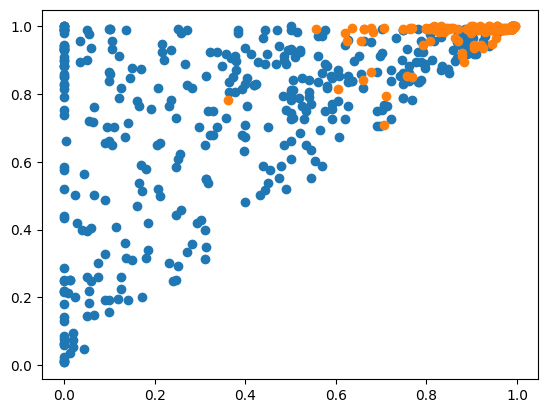

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from gudhi.tensorflow import CubicalLayer

data = np.load("../Dataset/mnist.npz")
X_train = data["x_train"]
y_train = data["y_train"]

idicies = np.where(y_train == 8)[0]
X_train = X_train[idicies][:32]

X_train = X_train.astype(np.float32) / 255.0

X_train_tf = tf.convert_to_tensor(X_train.reshape((32, 28, 28, 1)))
cubical_layer = CubicalLayer(homology_dimensions=[0, 1, 2])
persistence_diagrams_1 = cubical_layer(X_train_tf)

plt.scatter(persistence_diagrams_1[1][0].numpy()[:, 0], persistence_diagrams_1[1][0].numpy()[:, 1])
plt.scatter(persistence_diagrams_1[2][0].numpy()[:, 0], persistence_diagrams_1[2][0].numpy()[:, 1])
plt.show()

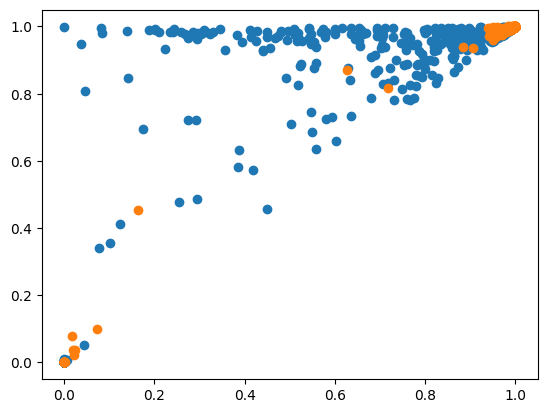

In [64]:
data = np.load("../Dataset/NoReg_Extra_6.npz")
X_train = data["images"]
y_train = data["labels"]

y_train = tf.argmax(y_train, axis=1)
idicies = np.where(y_train == 8)[0]
X_train = X_train[idicies][:32]

X_real = (X_train - tf.reduce_min(X_train)) / (tf.reduce_max(X_train) - tf.reduce_min(X_train))

X_train_tf = tf.convert_to_tensor(X_real)
persistence_diagrams_2 = cubical_layer(X_train_tf)

plt.scatter(persistence_diagrams_2[1][0].numpy()[:, 0], persistence_diagrams_2[1][0].numpy()[:, 1])
plt.scatter(persistence_diagrams_2[2][0].numpy()[:, 0], persistence_diagrams_2[2][0].numpy()[:, 1])
plt.show()

In [88]:
import tensorflow as tf

class PersistenceSetLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=1.0, mu=0.1, max_value=2000000, scale=0.25e-5, **kwargs):
        """
        Custom loss function for comparing persistence diagrams of different sizes.
        
        Parameters:
        - gamma: Controls how much long-lived features are weighted.
        - mu: Controls how much we penalize differences in diagram sizes.
        - max_value: Maximum value for the final loss function.
        - scale: The scale that multiplies on the final loss value.
        """
        super().__init__(**kwargs)
        self.gamma = gamma
        self.mu = mu
        self.max_value = max_value
        self.scale = scale
        
    def call(self, P, Q):
        """
        Computes the loss between two persistence diagrams P and Q.
        
        P: Tensor -> Persistence diagram with m points (birth, death)
        Q: Tensor -> Persistence diagram with n points (birth, death)
        """
        
        P = tf.concat(P, axis=0)
        P = tf.reshape(P, (-1, 2))
        
        Q = tf.concat(Q, axis=0)
        Q = tf.reshape(Q, (-1, 2))
        
        P_persistence = P[:, 1] - P[:, 0]
        Q_persistence = Q[:, 1] - Q[:, 0]

        def feature_transform(persistence):
            exp_term = tf.exp(-self.gamma * persistence)
            return tf.stack([exp_term, persistence * exp_term], axis=-1)

        P_features = feature_transform(P_persistence)
        Q_features = feature_transform(Q_persistence)

        P_sum = tf.reduce_sum(P_features, axis=0)
        Q_sum = tf.reduce_sum(Q_features, axis=0)

        feature_distance = tf.reduce_sum(tf.square(P_sum - Q_sum))

        size_difference = tf.cast(tf.shape(P)[0] - tf.shape(Q)[0], tf.float32)
        size_penalty = self.mu * tf.square(size_difference)        

        return tf.clip_by_value(feature_distance + size_penalty, 0.0, self.max_value) * self.scale
        
        
def call_cubical_layer(output):    
    flattened_output = []
    for tuple_ in output:
        flattened_output.extend(tuple_[0])
    
    return flattened_output


loss_fn = PersistenceSetLoss()

In [89]:
cubical_layer = CubicalLayer(homology_dimensions=[0, 1, 2])

for i in range(10):
    # real
    data = np.load("../Dataset/mnist.npz")
    X_train = data["x_train"]
    y_train = data["y_train"]
    
    idicies = np.where(y_train == i)[0]
    X_train = X_train[idicies][:32]
    X_train = (X_train - tf.reduce_min(X_train)) / (tf.reduce_max(X_train) - tf.reduce_min(X_train))
    X_train_tf = tf.convert_to_tensor(X_train)
    
    persistence_diagrams_1 = cubical_layer(X_train_tf)
    
    # fake
    data = np.load("../Dataset/NoReg_Extra_6.npz")
    X_train = data["images"]
    y_train = data["labels"]
    
    y_train = tf.argmax(y_train, axis=1)
    idicies = np.where(y_train == i)[0]
    X_train = X_train[idicies][:32]
    X_real = (X_train - tf.reduce_min(X_train)) / (tf.reduce_max(X_train) - tf.reduce_min(X_train))
    X_train_tf = tf.convert_to_tensor(X_real)
    
    persistence_diagrams_2 = cubical_layer(X_train_tf)
    
    # loss
    loss_value = loss_fn(call_cubical_layer(persistence_diagrams_1), call_cubical_layer(persistence_diagrams_2))
    print(f"Loss value for number {i}:", loss_value.numpy())

Loss value for number 0: 1.9798956
Loss value for number 1: 1.7125789
Loss value for number 2: 2.5005445
Loss value for number 3: 2.7119546
Loss value for number 4: 1.8049179
Loss value for number 5: 2.3715496
Loss value for number 6: 2.052973
Loss value for number 7: 2.6846914
Loss value for number 8: 1.7677662
Loss value for number 9: 1.4169219


In [53]:
def persistence_loss(pd1, pd2, lambdaa=1.0):
    # Compute persistence for each point
    pers1 = pd1[:, 1] - pd1[:, 0]  # shape (m,)
    pers2 = pd2[:, 1] - pd2[:, 0]  # shape (n,)
    
    # Pairwise L2 distances (m, n)
    pd1_exp = tf.expand_dims(pd1, 1)
    pd2_exp = tf.expand_dims(pd2, 0)
    pairwise_dist = tf.norm(pd1_exp - pd2_exp, axis=-1)
    
    # PWCD terms
    min_dist_pd1_to_pd2 = tf.reduce_min(pairwise_dist, axis=1)
    term1 = tf.reduce_sum(min_dist_pd1_to_pd2 * pers1) / tf.cast(tf.shape(pd1)[0], tf.float32)
    
    min_dist_pd2_to_pd1 = tf.reduce_min(tf.transpose(pairwise_dist), axis=1)
    term2 = tf.reduce_sum(min_dist_pd2_to_pd1 * pers2) / tf.cast(tf.shape(pd2)[0], tf.float32)
    
    pwcd = term1 + term2
    
    # Total persistence difference
    total_pers1 = tf.reduce_sum(pers1)
    total_pers2 = tf.reduce_sum(pers2)
    tpd = tf.abs(total_pers1 - total_pers2)
    
    return pwcd + lambdaa * tpd


a = persistence_loss(persistence_diagrams_1[1][0], persistence_diagrams_2[1][0])
a.numpy()

67.764595

In [ ]:
data = np.load("../Dataset/NoReg_Extra_6.npz")
X_train = data["images"]
y_train = data["labels"]

y_train = tf.argmax(y_train, axis=1)
X_real = (X_train - tf.reduce_min(X_train)) / (tf.reduce_max(X_train) - tf.reduce_min(X_train))

cubical_layer = CubicalLayer(homology_dimensions=[0, 1, 2])
digits = tf.constant([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=tf.int64)

hps = []
ph_losses = 0
for i, digit in enumerate(digits):
    indices = tf.where(y_train == digit)[:, 0]
    
    real_subset = tf.gather(X_real, indices)
    real_dgms = cubical_layer(real_subset)
    real_concat = tf.concat([real_dgms[1][0], real_dgms[2][0]], axis=0)
    hps.append(real_concat)

In [ ]:
def sliced_wasserstein_distance(PD1, PD2, num_projections=50):
    angles = tf.random.uniform([num_projections, 2], minval=-1, maxval=1)
    angles /= tf.norm(angles, axis=-1, keepdims=True)  # Normalize to unit vectors
    
    proj1 = tf.linalg.matmul(PD1, tf.transpose(angles))  # Shape [m, num_projections]
    proj2 = tf.linalg.matmul(PD2, tf.transpose(angles))  # Shape [n, num_projections]
    
    proj1 = tf.sort(proj1, axis=0)  # Shape [m, num_projections]
    proj2 = tf.sort(proj2, axis=0)  # Shape [n, num_projections]
    
    # Resample both to a common size (e.g., max(m, n))
    target_size = tf.maximum(tf.shape(proj1)[0], tf.shape(proj2)[0])
    proj1 = tf.image.resize(proj1[None, :, :], [target_size, num_projections])[0]
    proj2 = tf.image.resize(proj2[None, :, :], [target_size, num_projections])[0]

    return tf.reduce_mean(tf.abs(proj1 - proj2))

dist_swd = sliced_wasserstein_distance(hps[1], hps[8])
print(dist_swd)

In [ ]:
dist_swd / len(digits)

In [ ]:
def Rips(DX, mel, dim):
    rc = gd.RipsComplex(distance_matrix=DX, max_edge_length=mel)
    st = rc.create_simplex_tree(max_dimension=dim + 1)
    dgm = st.persistence()
    indices = st.persistence_pairs()
    return indices
    

class RipsModel(tf.keras.Model):
    def __init__(self, X, mel=12, dim=1, card=50):
        super(RipsModel, self).__init__()
        self.X = X
        self.mel = mel
        self.dim = dim
        self.card = card

    def call(self):
        m, d, c = self.mel, self.dim, self.card

        # Compute distance matrix
        DX = tfa.losses.metric_learning.pairwise_distance(self.X)
        DXX = tf.reshape(DX, [1, DX.shape[0], DX.shape[1]])

        # Turn numpy function into tensorflow function
        RipsTF = lambda DX: tf.numpy_function(Rips, [DX, m, d, c], [tf.int32 for _ in range(4 * c)])

        # Compute vertices associated to positive and negative simplices 
        # Don't compute gradient for this operation
        ids = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(RipsTF, DXX, dtype=[tf.int32 for _ in range(4 * c)]))

        # Get persistence diagram by simply picking the corresponding entries in the distance matrix
        dgm = tf.reshape(tf.gather_nd(DX, tf.reshape(ids, [2 * c, 2])), [c, 2])
        
        return dgm
    
model = RipsModel()
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)

for epoch in range(100):
    
    with tf.GradientTape() as tape:
        
        dgm = model.call()        
        loss = -tf.math.reduce_sum(tf.square(.5*(dgm[:,1]-dgm[:,0])))
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))